In [72]:
import matplotlib.pyplot as plt
import numpy as np
import sys

if ".." not in sys.path:
    sys.path.append('..')

from experiments.data.quantile import QuantileFunctionMVNDataProvider

d = 2
k = 1
dp = QuantileFunctionMVNDataProvider(k=k, d=d)


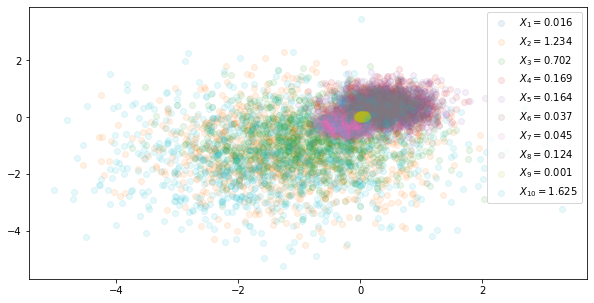

In [73]:

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sampled_x = []
for i in range(10):
    x = dp.sample_x(n=1)
    _, Y = dp.sample(n=1000, x=x)

    ax.scatter(
        Y[:,0],Y[:, 1],
        color=f"C{i}",
        label=rf"$X_{{{i+1}}}={{{(np.sum(x**2)).item():.3f}}}$",
        alpha=0.1,
    )

    sampled_x.append(x)

ax.legend()


In [74]:
from vqr.api import VectorQuantileRegressor

X, Y = dp.sample(n=10000)

vqr = VectorQuantileRegressor(
    n_levels=50,
    solver_opts=dict(
        verbose=True,
        num_epochs=2000,
        epsilon=1e-2,
        lr=0.9,
        lr_max_steps=10,
        lr_patience=500,
        lr_factor=0.9,
    )
)

vqr.fit(X, Y)

  0%|                                                                  | 0/2000 [00:00<?, ?epochs/s]

VectorQuantileRegressor(solver=RegularizedDualVQRSolver(eps=1e-02),
                        solver_opts={'epsilon': 0.01, 'lr': 0.9,
                                     'lr_factor': 0.9, 'lr_max_steps': 10,
                                     'lr_patience': 500, 'num_epochs': 2000,
                                     'verbose': True})

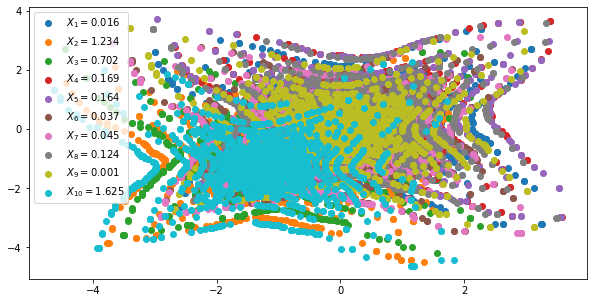

In [75]:

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for i, x in enumerate(sampled_x):
    Y = vqr.sample(n=2000, x=x)

    ax.scatter(
        Y[:,0],Y[:, 1],
        color=f"C{i}",
        label=rf"$X_{{{i+1}}}={{{(np.sum(x**2)).item():.3f}}}$"
    )

ax.legend()